# Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()
boston = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
#                     names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","target"])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Exploration

$$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$$

In [ ]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Heatmap

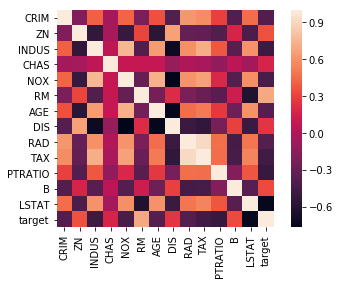

In [ ]:
hm = sns.heatmap(boston.corr(),
                 cbar=True, #disegna una barra con l'intensità del colore
                 square=True, #forza le caselle a una dimensione quadrata
                 yticklabels=boston.columns, #labels per i valori sull'asse Y
                 xticklabels=boston.columns) #labels per i valori sull'asse X
plt.show()

Features that are the most correlated with **MEDV** seem to be **RM** and **ZN**, while the less correlated (negative correlation) seem **LSTAT**, **PRATIO**, **TAX** and **INDUS**.


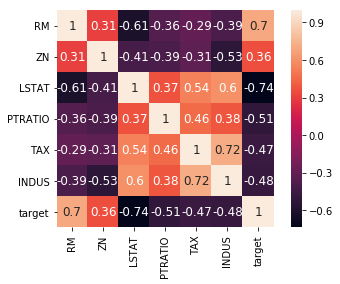

In [ ]:
cols=['RM',"ZN","LSTAT","PTRATIO","TAX","INDUS","target"]

hm = sns.heatmap(boston[cols].corr(),
                 cbar=True,
                 square=True,
                 yticklabels=boston[cols].columns,
                 xticklabels=boston[cols].columns,
                 annot=True,                         
                 annot_kws={'size':12})               # Lets annotate 12 as size dimension to make it in the square

plt.show()

[Seaborn](https://seaborn.pydata.org/) is a great library to visualize data. We can better perceive correlation by visualizing pairwise relationships in the dataset. 

By default, this function will generate an Axes grid in which each numeric variable in data is shared across the y-axes in a single row and the x-axes in a single column. A univariate distribution plot is drawn to show the marginal distribution of the data in each column for diagonal plots.

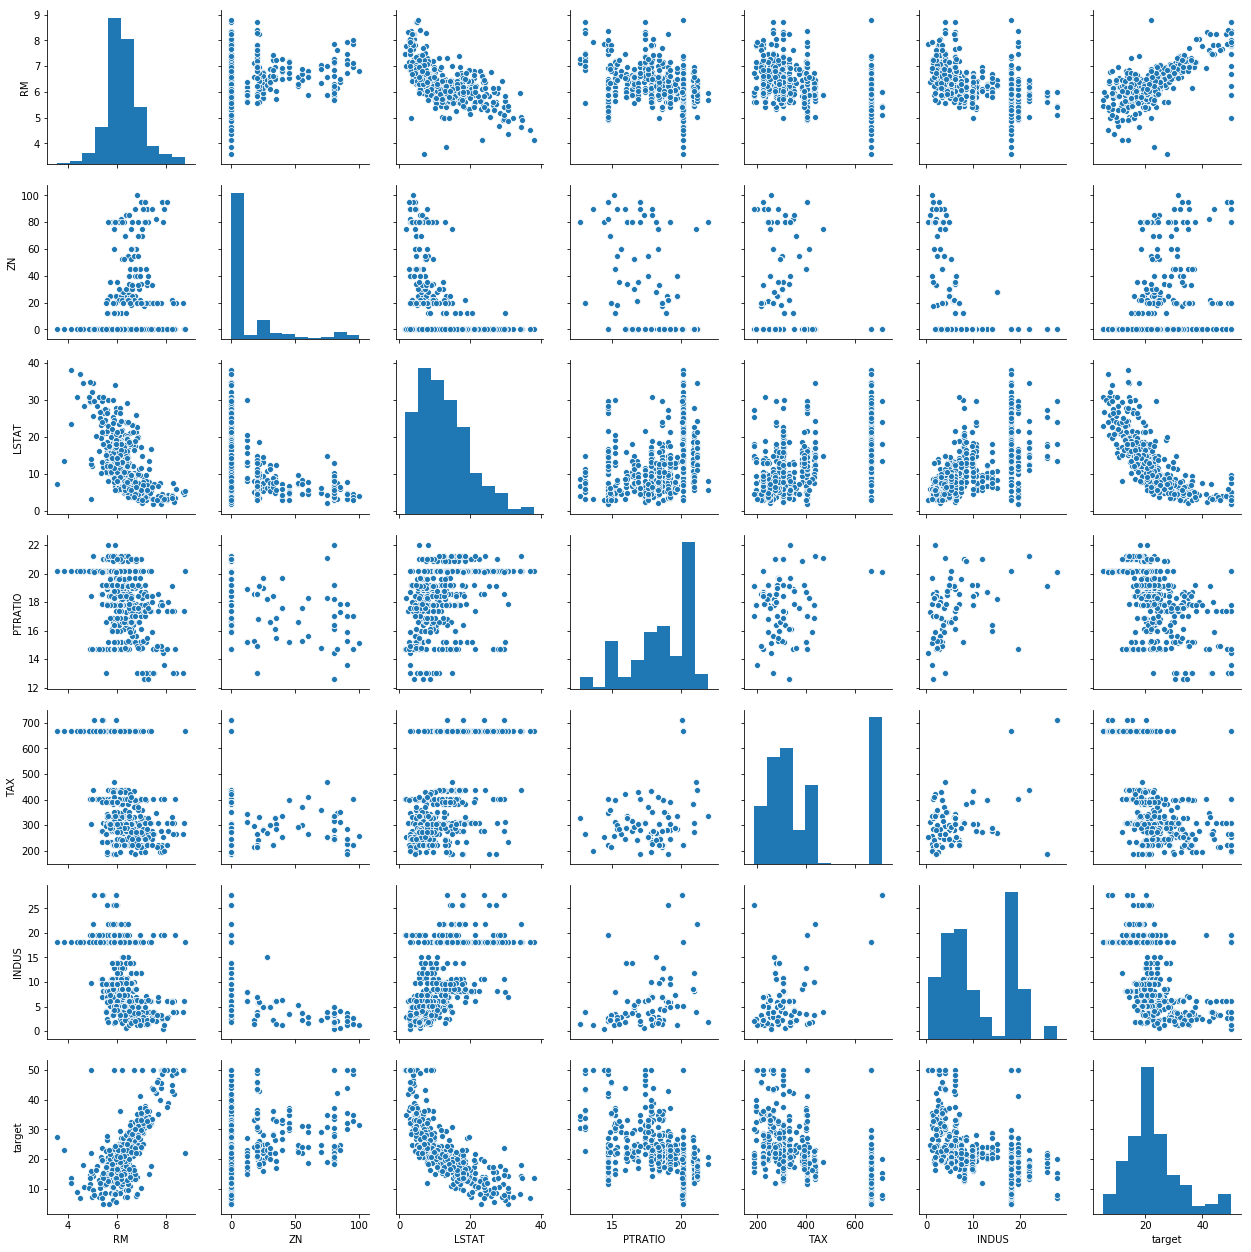

In [ ]:
sns.pairplot(boston[cols])

## Simple Linear Regression

### Docs:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
X = boston[["RM"]].values
Y = boston["target"].values
names = ['Intercept', 'RM']


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 47.03304747975518
R2 score: 0.43514364832115193


$$ MSE={\frac {\sum _{i=1}^{n}(y_{i}-{\widehat {y}}_{i})^{2}}{n}} $$

$$R^{2}={\frac {ESS}{TSS}}=1-{\frac {RSS}{TSS}} $$

Where:

$ESS=\sum _{{i=1}}^{n}({\hat  {y}}_{i}-\overline {y})^{2}$ it is the *Deviance* explained by the model (Explained Sum of Squares);

$TSS=\sum _{{i=1}}^{n}(y_{i}-\overline {y})^{2}$ total *Deviance* (Total Sum of Squares);

$RSS=\sum _{{i=1}}^{n}e_{i}^{2}=\sum _{{i=1}}^{n}(y_{i}-{\hat  {y}}_{i})^{2} $  Residual *Deviance* (Residual Sum of Squares);

In [ ]:
def summary(lm, X, Y, xnames):
    params = np.append(lm.intercept_,lm.coef_)
    pred = lm.predict(X)

    X = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((Y-pred)**2))/(len(X)-len(X.columns))

    var_b = MSE*(np.linalg.inv(np.dot(X.T,X)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(X)-1))) for i in ts_b]

    
    summary_df = {"Names": names, 
                "Coefficients": np.round(params,4), 
                "Standard Errors":np.round(sd_b,3), 
                "t values": np.round(ts_b,3), 
                "Probabilites": np.round(p_values,3)}

    return pd.DataFrame(summary_df)

In [ ]:
print(summary(ll, X_train, Y_train, names))

       Names  Coefficients  Standard Errors  t values  Probabilites
0  Intercept      -35.9943            3.133   -11.487           0.0
1         RM        9.3113            0.494    18.861           0.0


## Multiple Linear Regression

In [ ]:
X = boston[["RM","LSTAT"]].values
Y = boston["target"].values
names = ['Intercept', 'RM', 'LSTAT']


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)


ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 32.72507169281496
R2 score: 0.6069792285352371


In [ ]:
print(summary(ll, X_train, Y_train, names))

       Names  Coefficients  Standard Errors  t values  Probabilites
0  Intercept       -2.5372            3.797    -0.668         0.504
1         RM        5.2735            0.530     9.951         0.000
2      LSTAT       -0.6418            0.053   -12.211         0.000


In [ ]:
X = boston.drop("target", axis=1).values
Y = boston["target"].values

names = ['Intercept'] + boston.drop("target", axis=1).columns.tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [ ]:
ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 27.195965766883234
R2 score: 0.6733825506400193


In [ ]:
print(summary(ll, X_train, Y_train, names))

        Names  Coefficients  Standard Errors  t values  Probabilites
0   Intercept       37.9371            5.876     6.457         0.000
1        CRIM       -0.1213            0.038    -3.185         0.002
2          ZN        0.0445            0.016     2.834         0.005
3       INDUS        0.0113            0.068     0.166         0.868
4        CHAS        2.5112            1.011     2.483         0.013
5         NOX      -16.2313            4.487    -3.618         0.000
6          RM        3.8591            0.491     7.867         0.000
7         AGE       -0.0100            0.016    -0.634         0.527
8         DIS       -1.5003            0.234    -6.402         0.000
9         RAD        0.2421            0.077     3.152         0.002
10        TAX       -0.0111            0.004    -2.586         0.010
11    PTRATIO       -1.0178            0.150    -6.803         0.000
12          B        0.0068            0.003     2.099         0.036
13      LSTAT       -0.4867       

## Polynomial Regression

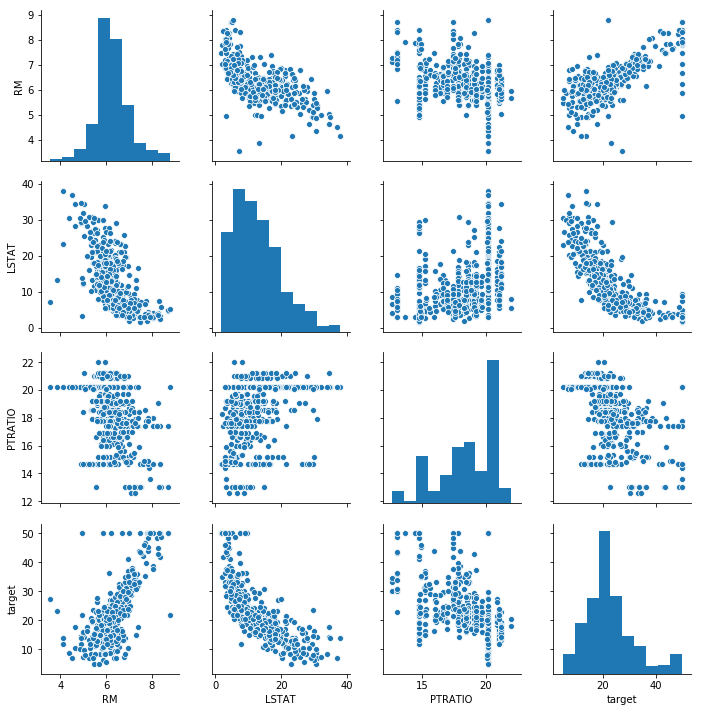

In [ ]:
cols = ["RM","LSTAT","PTRATIO","target"]
sns.pairplot(boston[cols])

The correlation between **LSTAT** e **MEDV** is clearly non-linear, as a matter of fact by observing the graph it can be spotted the pairwise values that shape a curve.

In [ ]:
X = boston[["LSTAT"]].values
Y = boston["target"].values
names = ['Intercept', 'LSTAT']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)


## Docs:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [ ]:
mse_test = []
mse_train = []
r2_test = []
r2_train = []
degree = range(1,11)

for i in degree:
    polyfeats = PolynomialFeatures(degree=i)
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    ll = LinearRegression()
    ll.fit(X_train_poly, Y_train)
    Y_pred = ll.predict(X_test_poly)
    Y_train_pred = ll.predict(X_train_poly)


    r2_test.append(r2_score(Y_test, Y_pred))
    r2_train.append(r2_score(Y_train, Y_train_pred))
    
    
    mse_test.append(np.round(mean_squared_error(Y_test, Y_pred), 2))
    mse_train.append(np.round(mean_squared_error(Y_train, Y_train_pred), 2))

In [ ]:
out = pd.DataFrame({"degree": degree, "mse train": mse_train, "mse test": mse_test, "r2 train": r2_train, "r2 test": r2_test})

In [ ]:
out

,degree,mse train,mse test,r2 train,r2 test
0,1,37.93,39.82,0.552478,0.521805
1,2,29.00,33.60,0.657870,0.596443
2,3,27.54,32.09,0.675087,0.614586
3,4,26.76,29.84,0.684295,0.641581
4,5,25.90,29.85,0.694425,0.641544
5,6,25.89,29.55,0.694610,0.645132
6,7,25.88,29.67,0.694636,0.643649
7,8,25.65,31.82,0.697401,0.617810
8,9,25.63,30.46,0.697681,0.634177
9,10,25.62,35.38,0.697768,0.575115


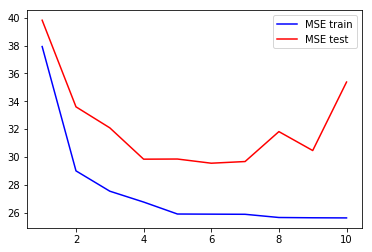

In [ ]:
plt.plot(out['degree'], out['mse train'], "b", label="MSE train")
plt.plot(out['degree'], out['mse test'], "r", label="MSE test")
plt.legend()
plt.show()

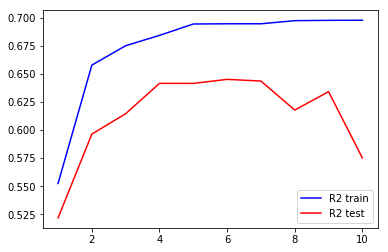

In [ ]:
plt.plot(out['degree'], out['r2 train'], "b", label="R2 train")
plt.plot(out['degree'], out['r2 test'], "r", label="R2 test")
plt.legend()
plt.show()

The model displays improvement up to the 4th grade, then the R2 performance slowly starts to stagnate and then gets worse for higher levels polinomia. 
The model definetly benefits from the 4th polynomial relationship with a single feature.

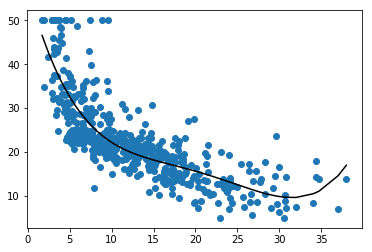

In [ ]:
polyfeats = PolynomialFeatures(degree=4)

inds = X.ravel().argsort()  
X = X.ravel()[inds].reshape(-1,1)
Y = Y[inds]
X_poly = polyfeats.fit_transform(X)
ll = LinearRegression()
ll.fit(X_poly, Y)

plt.scatter(X, Y)
plt.plot(X, ll.predict(X_poly), 'k')
plt.show()
